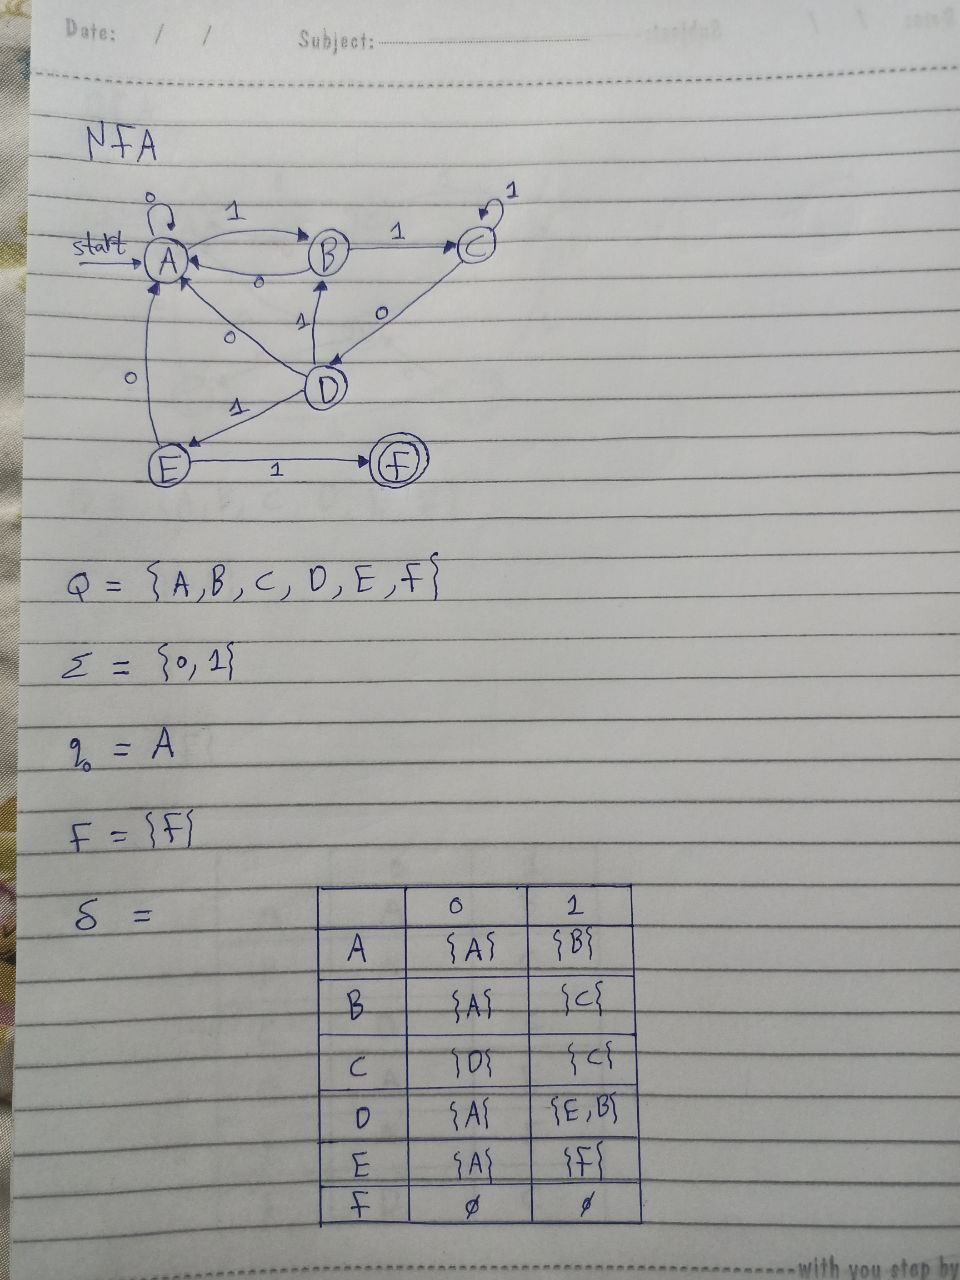

In [1]:
def NFA_count(input):
  # each state has a mapping dictionary from current symbol to a set of one or more than one state
  transition = {'A': {'0': {'A'}, '1': {'B'}},
                'B': {'0': {'A'}, '1': {'C'}},
                'C': {'0': {'D'}, '1': {'C'}},
                'D': {'0': {'A'}, '1': {'E', 'B'}},
                'E': {'0': {'A'}, '1': {'F'}},
                'F': {}
                }
  start_state = 'A'
  accepted_state = 'F'
  current_states = {start_state}
  # count the number of occurrences of 11011 in the input
  count = 0

  for symbol in input:
    next_states = set()
    for state in current_states:
      # check if state has next states given symbol
      if symbol in transition[state]:
        # add the next states of the state given symbol to the next_states
        next_states.update(transition[state][symbol])
    # current_states will be next_states to be processed next
    current_states = next_states
    if accepted_state in current_states:
      # that means the pattern 11011 occurrenced then increase the count by one
      count+=1

  return count

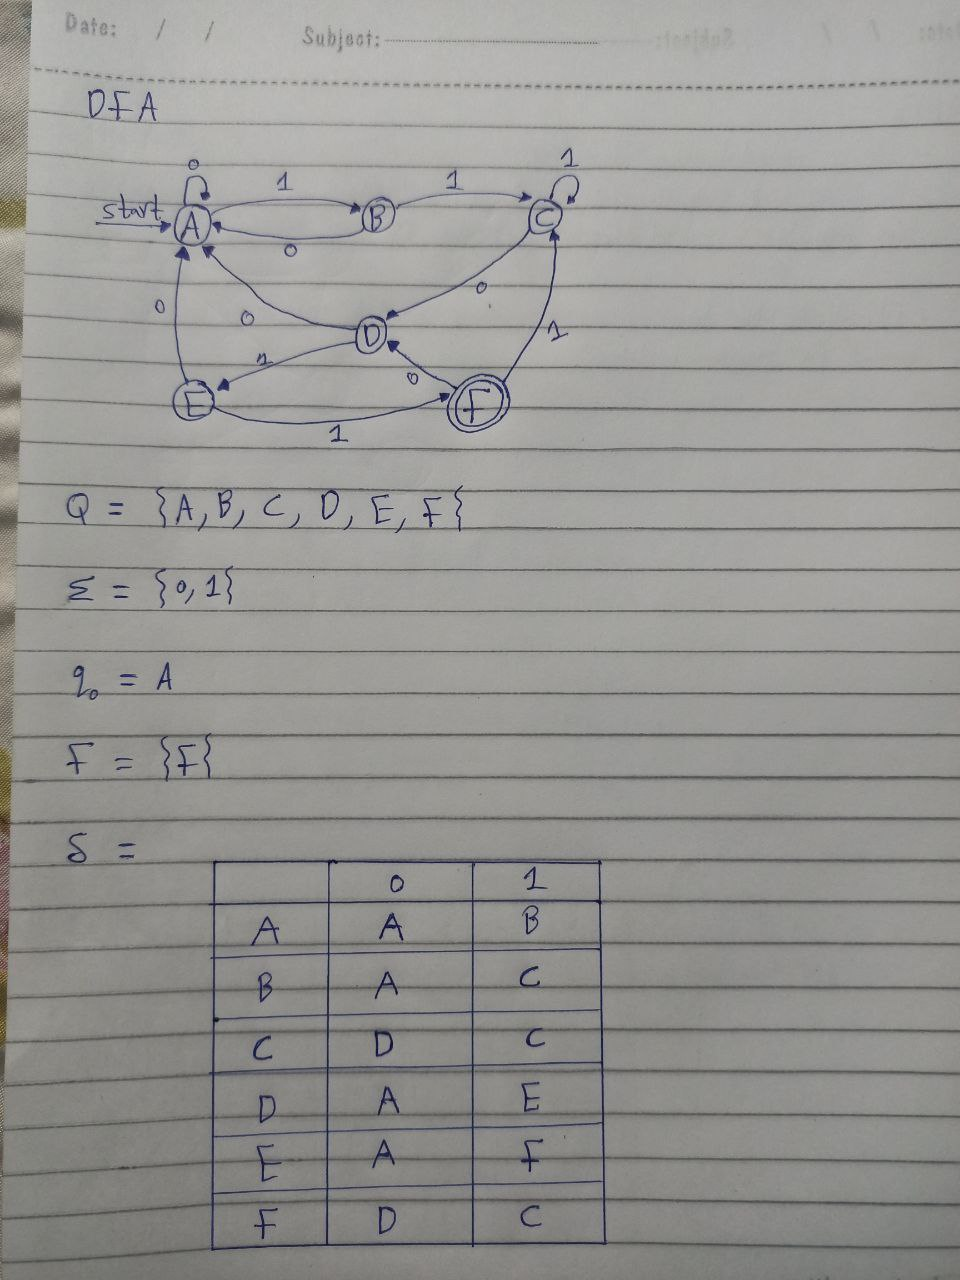

In [3]:
def DFA_count(input):
  # each state has a mapping dictionary from current symbol to exactly one state
  transition = {'A': {'0': 'A', '1': 'B'},
                'B': {'0': 'A', '1': 'C'},
                'C': {'0': 'D', '1': 'C'},
                'D': {'0': 'A', '1': 'E'},
                'E': {'0': 'A', '1': 'F'},
                'F': {'0': 'D', '1': 'C'}
                }
  start_state = 'A'
  accepted_state = 'F'
  current_states = {start_state}
  # count the number of occurrences of 11011 in the input
  count = 0

  for symbol in input:
    next_states = set()
    for state in current_states:
      # add the next state of the state given symbol to the next_states
      next_states.add(transition[state][symbol])
    # current_states will be next_states to be processed next
    current_states = next_states
    if accepted_state in current_states:
      # that means the pattern 11011 occurrenced then increase the count by one
      count+=1

  return count

In [10]:
# each element (test_input, result)
test_cases = [('110111', 1), ('11111', 0), ('11011011011', 3), ('1110111011', 2), ('001010110', 0), ('0110111101100110', 2)]

is_accepted =  True
print('DFA Test-------------')
for t in test_cases:
  result = DFA_count(t[0])
  print('input: {0}, count = {1}'.format(t[0], result))
  if result != t[1]:
    print('test failed -> input: {0} , expected_result: {1} , actual_result: {2}'.format(t[0], t[1], result))
    is_accepted = False

if is_accepted:
  print('All tests passed')

DFA Test-------------
input: 110111, count = 1
input: 11111, count = 0
input: 11011011011, count = 3
input: 1110111011, count = 2
input: 001010110, count = 0
input: 0110111101100110, count = 2
All tests passed


In [11]:
# each element (test_input, result)
test_cases = [('110111', 1), ('11111', 0), ('11011011011', 3), ('1110111011', 2), ('001010110', 0), ('0110111101100110', 2)]

is_accepted =  True
print('NFA Test-------------')
for t in test_cases:
  result = NFA_count(t[0])
  print('input: {0}, count = {1}'.format(t[0], result))
  if result != t[1]:
    print('test failed -> input: {0} , expected_result: {1} , actual_result: {2}'.format(t[0], t[1], result))
    is_accepted = False

if is_accepted:
  print('All tests passed')

NFA Test-------------
input: 110111, count = 1
input: 11111, count = 0
input: 11011011011, count = 3
input: 1110111011, count = 2
input: 001010110, count = 0
input: 0110111101100110, count = 2
All tests passed
